In [12]:
import numpy as np
import matplotlib.pyplot as plt

from data import get_names

In [4]:
words = get_names()
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']



- bigram character language model
- receives a single character as input; output is the probability distribution of the next character in the sequence
- using gradient descent 

In [11]:
characters = ['.', *sorted({c for w in words for c in w})]
print(characters)
print(len(characters))
index = {
    c:i
    for i, c in enumerate(characters)
}
index
print(index)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [10]:
# create the training set of all of the bigrams
# x is the input, y is the target (i.e. the next character)
x, y = [], []
training_data = []
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        x.append(index[c1])
        y.append(index[c2])

# x = torch.tensor(x)
# y = torch.tensor(y)

print(x)
print(y)


[0, 5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1, 2, 5, 12, 12, 1, 0, 19, 15, 16, 8, 9, 1, 0, 3, 8, 1, 18, 12, 15, 20, 20, 5, 0, 13, 9, 1, 0, 1, 13, 5, 12, 9, 1, 0, 8, 1, 18, 16, 5, 18, 0, 5, 22, 5, 12, 25, 14, 0, 1, 2, 9, 7, 1, 9, 12, 0, 5, 13, 9, 12, 25, 0, 5, 12, 9, 26, 1, 2, 5, 20, 8, 0, 13, 9, 12, 1, 0, 5, 12, 12, 1, 0, 1, 22, 5, 18, 25, 0, 19, 15, 6, 9, 1, 0, 3, 1, 13, 9, 12, 1, 0, 1, 18, 9, 1, 0, 19, 3, 1, 18, 12, 5, 20, 20, 0, 22, 9, 3, 20, 15, 18, 9, 1, 0, 13, 1, 4, 9, 19, 15, 14, 0, 12, 21, 14, 1, 0, 7, 18, 1, 3, 5, 0, 3, 8, 12, 15, 5, 0, 16, 5, 14, 5, 12, 15, 16, 5, 0, 12, 1, 25, 12, 1, 0, 18, 9, 12, 5, 25, 0, 26, 15, 5, 25, 0, 14, 15, 18, 1, 0, 12, 9, 12, 25, 0, 5, 12, 5, 1, 14, 15, 18, 0, 8, 1, 14, 14, 1, 8, 0, 12, 9, 12, 12, 9, 1, 14, 0, 1, 4, 4, 9, 19, 15, 14, 0, 1, 21, 2, 18, 5, 25, 0, 5, 12, 12, 9, 5, 0, 19, 20, 5, 12, 12, 1, 0, 14, 1, 20, 1, 12, 9, 5, 0, 26, 15, 5, 0, 12, 5, 1, 8, 0, 8, 1, 26, 5, 12, 0, 22, 9, 15, 12, 5, 20, 0, 1, 21, 18, 15, 18, 1, 

In [22]:
# encode
def one_hot_encode(index: int) -> np.array:
    """Return a one-hot encoded vector of the given index."""
    vector = np.zeros(len(characters))
    vector[index] = 1
    return vector

x_encoded = np.array([one_hot_encode(i) for i in x])
y_encoded = np.array([one_hot_encode(i) for i in y])

print(x_encoded[:6])
plt.imshow(x_encoded[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


---

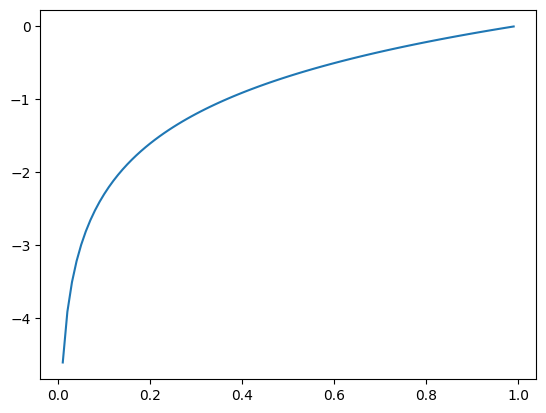

In [10]:
# plot log values for 0.01 to 1
import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
plt.plot(x, y)

In [5]:
import numpy as np

# these are the probabilities predicted by the model associated with the **correct** class
# lower values are bad because they are less confident in the right answer
predicted = [0.01, 0.02, 0.03, 0.04, 0.01]
# lower decimal values result in higher negative log values
# cross entropy loss i.e. log loss
print(np.log(predicted))
print(-np.log(predicted).mean())


[-4.60517019 -3.91202301 -3.5065579  -3.21887582 -4.60517019]
3.9695594199185025


In [6]:
import numpy as np

# these are the probabilities predicted by the model associated with the **correct** class
# higher values are good because they are more/correctly confident in the right answer
predicted = [0.81, 0.82, 0.83, 0.84, 0.81]
# lower decimal values result in higher negative log values
# cross entropy loss i.e. log loss
print(np.log(predicted))
print(-np.log(predicted).mean())

[-0.21072103 -0.19845094 -0.18632958 -0.17435339 -0.21072103]
0.19611519333828292


In [20]:

import numpy as np
# rng = np.random.default_rng(seed=42)
x = np.zeros((1, 1, 2, 2)) + 1
padding = 1
x = np.pad(
    x,
    (
        (0, 0),  # no padding along the batch size dimension.
        (0, 0),  # no padding along the channels dimension.
        (padding, padding),  # padding before and after the height
        (padding, padding),  # padding before and after the width
    ),
    mode='constant',
)
x

array([[[[0., 0., 0., 0.],
         [0., 1., 1., 0.],
         [0., 1., 1., 0.],
         [0., 0., 0., 0.]]]])